# Hector Salamanca: CS algorithms and information theory

### Method 1: Linear search

In [144]:
""" SETUP """
alphabet = [chr(x) for x in range(48, 58)] + [chr(x) for x in range(97, 123)]
print(alphabet)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [145]:
from random import randint

def gen_msg(length, alphabet):
    output = [None]*length
    for i in range(length):
        output[i] = alphabet[randint(0, len(alphabet) - 1)]
    return output
        
for _ in range(5):
    print(gen_msg(8, alphabet))

['a', 'z', '6', '0', '0', 'e', 't', '2']
['m', 'w', 'c', '4', 'p', 'p', 'd', 'i']
['l', 'y', 'c', 'y', '0', 'y', 'r', 'h']
['e', 'y', '1', 'b', 'o', '7', 'g', '2']
['k', '4', 'e', 'v', '5', 'r', '3', 'c']


In [146]:
def print_results(maxes, mins, avgs):
    print(f'Max number of checks: {maxes}')
    print(f'Min number of checks: {mins}')
    print(f'Avg number of checks: {avgs}')

In [166]:
""" Testing parameters """
from tqdm import notebook

num_trials = 10000

all_checks = []

msg_lens = range(4, 11)

In [167]:
""" Method 1: linear search """
maxes1 = []
mins1 = []
avgs1 = []

for msg_len in notebook.tqdm(msg_lens):
    
    print(f'Working on message length {msg_len}...')
    
    all_checks = []

    for i in range(num_trials):
        msg = gen_msg(msg_len, alphabet)

        #print(msg)

        checks = 0

        for letter in msg:
            for j in range(len(alphabet)):
                a = alphabet[j]
                checks += 1
                #print('Is it ', a, '?')
                if letter == a:
                    break

        all_checks.append(checks)

    maxes1.append(max(all_checks))
    mins1.append(min(all_checks))
    avgs1.append(sum(all_checks)/num_trials)
    
print('Done.')

Working on message length 4...
Working on message length 5...
Working on message length 6...
Working on message length 7...
Working on message length 8...
Working on message length 9...
Working on message length 10...

Done.


In [168]:
print_results(maxes1, mins1, avgs1)

Max number of checks: [135, 171, 193, 223, 251, 273, 291]
Min number of checks: [12, 11, 27, 42, 42, 64, 75]
Avg number of checks: [73.8011, 92.6137, 110.7409, 129.4097, 147.8746, 166.648, 184.699]


### Method 2: Grid search

In [169]:
""" Method 2: Grid search """
grid = [['a', 'b', 'c', 'd', '1', '2'],\
        ['e', 'f', 'g', 'h', '3', '4'],\
        ['i', 'j', 'k', 'l', 'm', 'n'],\
        ['o', 'p', 'q', 'r', 's', 't'],\
        ['u', 'v', 'w', 'x', 'y', 'z'],\
        ['5', '6', '7', '8', '9', '0']]

In [170]:
maxes2 = []
mins2 = []
avgs2 = []

for msg_len in notebook.tqdm(msg_lens):
    
    print(f'Working on message length {msg_len}...')
    
    all_checks = []

    for i in range(num_trials):
        msg = gen_msg(msg_len, alphabet)

        checks = 0

        for letter in msg:
            
            # Is it in this row?
            for row in grid:
                checks += 1
                if letter in row:
                    for char in row:
                        checks += 1
                        if char == letter:
                            break
                    break
            
            
        all_checks.append(checks)

    maxes2.append(max(all_checks))
    mins2.append(min(all_checks))
    avgs2.append(sum(all_checks)/num_trials)
    
print('Done.')

Working on message length 4...
Working on message length 5...
Working on message length 6...
Working on message length 7...
Working on message length 8...
Working on message length 9...
Working on message length 10...

Done.


In [171]:
print_results(maxes2, mins2, avgs2)

Max number of checks: [44, 54, 63, 71, 81, 88, 99]
Min number of checks: [11, 15, 21, 23, 31, 35, 41]
Avg number of checks: [28.0604, 34.9236, 41.9575, 49.0138, 55.9621, 63.0193, 70.1043]


### Method 3: Binary search

In [172]:
def binary_search_count(alphabet, target):
    lo = 0
    hi = len(alphabet) - 1
    mid = None
    checks = 0
    
    while lo <= hi:
        mid = lo + ((hi - lo) // 2)
        
        curr = alphabet[mid]
        
        # Checking if we landed on the correct letter
        checks += 1
        if curr == target: return checks
        
        # To ask someone if it's in the left or right subarray, it takes an additional check
        checks += 1
        if curr < target: lo = mid + 1
            
        elif curr > target: hi = mid - 1
            
        
    # target not found
    return -1 
        

In [173]:
def binary_search_count_mod(alphabet, target):
    # Reduce expected number of checks by checking if target is in left or subarray first
    lo = 0
    hi = len(alphabet) - 1
    mid = None
    checks = 0
    
    while lo <= hi:
        mid = lo + ((hi - lo) // 2)
        
        curr = alphabet[mid]
        
        # "Is it in the left?"
        checks += 1
        if curr > target: 
            hi = mid - 1
            
        # "Is it in the right?"
        elif curr < target:
            checks += 1
            lo = mid + 1
            
        # "Not in the left or the right? This must be it"
        else:
            return checks
            
        
    # target not found
    return -1 
        

In [174]:
maxes3 = []
mins3 = []
avgs3 = []

maxes3mod = []
mins3mod = []
avgs3mod = []

"""
Communication algorithm to determine 1 character in the message:
0. If array of possible characters is of size 1, you found the character (Done). Else, go to 1.
1. Ask if letter is to the left of mid. If yes, go to 3. Else, go to 2.
2. Ask if letter is to the right of mid. If yes, go to 3. Else, the letter is at mid (Done).
3. Reposition left, mid, and hi. Go to 0.

"""

for msg_len in notebook.tqdm(msg_lens):
    
    print(f'Working on message length {msg_len}...')
    
    all_checks = []
    all_checks_mod = []

    for i in range(num_trials):
        msg = gen_msg(msg_len, alphabet)
        checks = 0
        checks_mod = 0
        
        for letter in msg:
        
            checks += binary_search_count(alphabet, letter)   
            checks_mod += binary_search_count_mod(alphabet, letter)
            
        all_checks.append(checks)
        all_checks_mod.append(checks_mod)

    maxes3.append(max(all_checks))
    mins3.append(min(all_checks))
    avgs3.append(sum(all_checks)/num_trials)
    
    maxes3mod.append(max(all_checks_mod))
    mins3mod.append(min(all_checks_mod))
    avgs3mod.append(sum(all_checks_mod)/num_trials)
    
print('Done.')

Working on message length 4...
Working on message length 5...
Working on message length 6...
Working on message length 7...
Working on message length 8...
Working on message length 9...
Working on message length 10...

Done.


In [175]:
print_results(maxes3, mins3, avgs3)
print('\n', '='*20, '\n')
print_results(maxes3mod, mins3mod, avgs3mod)

Max number of checks: [44, 53, 62, 73, 82, 91, 102]
Min number of checks: [10, 15, 20, 29, 32, 41, 44]
Avg number of checks: [31.3554, 39.161, 47.1094, 54.734, 62.6668, 70.3104, 78.3364]


Max number of checks: [41, 49, 57, 67, 76, 81, 89]
Min number of checks: [9, 13, 16, 22, 28, 29, 36]
Avg number of checks: [25.3175, 31.6825, 38.0735, 44.2273, 50.6955, 56.8382, 63.2938]


# Using real words

### Method 1+/2+: Letter-frequency ordered search

In [176]:
""" Load vocab """
import spacy

nlp = spacy.load("en_core_web_md")

vocab = list(nlp.vocab.strings)

In [177]:
alphabet_p = ['e', 't', 'a', 'r', 'i', 'o', 'n', 's', 'h', 'd', 'l', 'u', 'w', 'm', 'f', 'c',\
            'g', 'y', 'p', 'b', 'k', 'v', 'j', 'x', 'q', 'z', '0', '1', '2', '3', '4', '5',\
            '6', '7', '8', '9']

In [178]:
print('Vocab words (initially): ', len(vocab))

vocab = [x.lower() for x in vocab]

vocab_clean = set()

for word in vocab:
    invalid = False
    for char in word:
        if char not in alphabet_p:
            invalid = True
            break
    if not invalid:
        vocab_clean.add(word)
            
print('Vocab words (pre-processed): ', len(vocab_clean))

Vocab words (initially):  1476043
Vocab words (pre-processed):  423759


In [179]:
from collections import Counter

lengths = [len(x) for x in vocab_clean]
counter = Counter(lengths)

In [180]:
for length in msg_lens:
    print(f'Words of length {length} in vocab: {counter[length]}')

Words of length 4 in vocab: 37111
Words of length 5 in vocab: 48166
Words of length 6 in vocab: 60315
Words of length 7 in vocab: 63051
Words of length 8 in vocab: 57974
Words of length 9 in vocab: 47256
Words of length 10 in vocab: 34636


In [181]:
from collections import defaultdict 

vocab_final = defaultdict(set)

for word in vocab_clean:
    length = len(word)
    vocab_final[length].add(word)

In [182]:
from random import sample

def get_word(vocab, msg_length):
    return sample(vocab[msg_length], 1)[0]

In [183]:
get_word(vocab_final, 6)

'dongbu'

In [184]:
""" Method 1+: Frequency linear search """

maxes1p = []
mins1p = []
avgs1p = []

for msg_len in notebook.tqdm(msg_lens):
    
    print(f'Working on message length {msg_len}...')
    
    all_checks = []

    for i in range(num_trials):
        msg = get_word(vocab_final, msg_len)

        #print(msg)

        checks = 0

        for letter in msg:
            for j in range(len(alphabet_p)):
                a = alphabet_p[j]
                checks += 1
                #print('Is it ', a, '?')
                if letter == a:
                    break

        all_checks.append(checks)

    maxes1p.append(max(all_checks))
    mins1p.append(min(all_checks))
    avgs1p.append(sum(all_checks)/num_trials)
    
print('Done.')

Working on message length 4...
Working on message length 5...
Working on message length 6...
Working on message length 7...
Working on message length 8...
Working on message length 9...
Working on message length 10...

Done.


In [185]:
print_results(maxes1p, mins1p, avgs1p)

Max number of checks: [144, 171, 180, 227, 280, 278, 328]
Min number of checks: [6, 6, 11, 8, 20, 9, 21]
Avg number of checks: [57.4634, 50.978, 53.9291, 59.9236, 67.0021, 73.8359, 81.0239]


In [186]:
""" Method 2+: Frequency Grid search """
grid_p = [['e', 't', 'r', 'n', '0', '1'],\
        ['a', 'i', 's', 'l', '2', '3'],\
        ['o', 'h', 'u', 'f', 'y', 'k'],\
        ['d', 'w', 'c', 'p', 'v', 'x'],\
        ['m', 'g', 'b', 'j', 'q', 'z'],\
        ['4', '5', '6', '7', '8', '9']]

In [187]:
maxes2p = []
mins2p = []
avgs2p = []

for msg_len in notebook.tqdm(msg_lens):
    
    print(f'Working on message length {msg_len}...')
    
    all_checks = []

    for i in range(num_trials):
        msg = get_word(vocab_final, msg_len)

        checks = 0

        for letter in msg:
            
            # Is it in this row?
            for row in grid_p:
                checks += 1
                if letter in row:
                    for char in row:
                        checks += 1
                        if char == letter:
                            break
                    break
            
            
        all_checks.append(checks)

    maxes2p.append(max(all_checks))
    mins2p.append(min(all_checks))
    avgs2p.append(sum(all_checks)/num_trials)
    
print('Done.')

Working on message length 4...
Working on message length 5...
Working on message length 6...
Working on message length 7...
Working on message length 8...
Working on message length 9...
Working on message length 10...

Done.


In [188]:
print_results(maxes2p, mins2p, avgs2p)

Max number of checks: [47, 54, 72, 84, 75, 91, 100]
Min number of checks: [11, 10, 12, 19, 16, 22, 23]
Avg number of checks: [23.4301, 25.9043, 29.6224, 34.0896, 38.5815, 42.9432, 47.5094]


### Method 4: Prefix tree

In [189]:
def make_prefix_tree(words):
    # https://stackoverflow.com/questions/11015320/how-to-create-a-trie-in-python
    root = dict()
    end = '_end_' # Special flag indicating end of a word
    
    for word in words:
        current_dict = root
        for letter in word:
            current_dict = current_dict.setdefault(letter, {})
        current_dict[end] = end
    
    return root

In [190]:
pt = make_prefix_tree(['car', 'card', 'cars'])

In [191]:
pt['c']['a']['r']

{'_end_': '_end_', 'd': {'_end_': '_end_'}, 's': {'_end_': '_end_'}}

In [192]:
pt = make_prefix_tree(vocab_clean) # vocab_clean is vocab as a set

In [193]:
alphabet_p = ['e', 't', 'a', 'r', 'i', 'o', 'n', 's', 'h', 'd', 'l', 'u', 'w', 'm', 'f', 'c',\
            'g', 'y', 'p', 'b', 'k', 'v', 'j', 'x', 'q', 'z', '0', '1', '2', '3', '4', '5',\
            '6', '7', '8', '9', '_end_']

In [194]:
def found_early(rem_word, curr_dict):
    next_dict = curr_dict[rem_word[0]]
    num_branches = len(next_dict.keys())
    
    singular = False
    if len(rem_word) > 1:
        singular = found_early(rem_word[1:], next_dict)
        
    else:
        if num_branches == 1 and '_end_' in next_dict.keys():
            singular = True
            
    return singular

In [195]:
maxes4 = []
mins4 = []
avgs4 = []
end = '_end_'
all_early_finds = []

for msg_len in notebook.tqdm(msg_lens):
    
    print(f'Working on message length {msg_len}...')
    
    all_checks = []
    early_finds = 0

    for i in range(num_trials):
        msg = get_word(vocab_final, msg_len)

        checks = 0

        curr_dict = pt
        
        for j in range(msg_len-1):
                
            letter = msg[j]
            next_letter = msg[j+1]
            
            curr_dict = curr_dict[letter]
            
            num_branches = len(curr_dict)
            
            if num_branches == 1 and end in curr_dict:
                # Word found, no need for another check
                break
                
            elif num_branches == 1 and end not in curr_dict: 
                # Did you find the word early?
                singular = found_early(msg[j+1:], curr_dict)
                if singular: 
                    early_finds += 1
                    break

            for branch in sorted(curr_dict.keys(), key = lambda x: alphabet_p.index(x)): 
                checks += 1
                if branch == next_letter:
                    # Found the next letter of the word
                    break
                        
        curr_dict = curr_dict[next_letter]
        
        for branch in sorted(curr_dict.keys(), key = lambda x: alphabet_p.index(x)): 
            checks += 1
            if branch == next_letter:
                break
        
        #if checks < msg_len:
        #    print(checks, msg)
                        
            
            
        all_checks.append(checks)

    maxes4.append(max(all_checks))
    mins4.append(min(all_checks))
    avgs4.append(sum(all_checks)/num_trials)
    all_early_finds.append(early_finds)
    
print('Done.')

Working on message length 4...
Working on message length 5...
Working on message length 6...
Working on message length 7...
Working on message length 8...
Working on message length 9...
Working on message length 10...

Done.


In [196]:
print_results(maxes4, mins4, avgs4)
print('Early finds (%): ', [x*100/num_trials for x in all_early_finds])

Max number of checks: [95, 107, 103, 112, 105, 96, 119]
Min number of checks: [3, 5, 6, 6, 6, 7, 6]
Avg number of checks: [33.8096, 29.8665, 29.4275, 30.4458, 31.848, 33.2334, 34.3684]
Early finds (%):  [2.34, 13.35, 31.52, 51.17, 65.12, 73.28, 78.09]


### Method 5: NLP

In [ ]:
# I leave this as an exercise to the reader (:

# Plotting results

In [197]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Average checks needed')

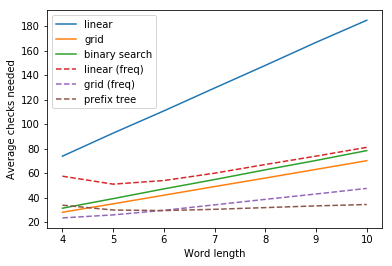

In [209]:
plt.plot(msg_lens, avgs1)
plt.plot(msg_lens, avgs2)
plt.plot(msg_lens, avgs3)
plt.plot(msg_lens, avgs1p, linestyle='dashed')
plt.plot(msg_lens, avgs2p, linestyle='dashed')
plt.plot(msg_lens, avgs4, linestyle='dashed')
plt.legend(['linear', 'grid', 'binary search', 'linear (freq)', 'grid (freq)', 'prefix tree'])
plt.xlabel('Word length')
plt.ylabel('Average checks needed')

In [205]:
msg_lens

range(4, 11)

### Appendix

Gradient colors, from 2 to 13 steps generated from 2 given gradient endpoints at https://www.colorhexa.com/1eff02-to-ff0000 :

1eff02
31ea02
44d402
56bf02
69aa01
7c9501
8e8001
a16a01
b45501
c74001
da2b00
ec1500
ff0000


English relative letter frequency: https://en.wikipedia.org/wiki/Letter_frequency